<a href="https://colab.research.google.com/github/lalitasharma04/face_mask_detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import os
os.environ['KAGGLE_USERNAME']='lalitasharma04'
os.environ['KAGGLE_KEY']='83a1fd07f4e64ceff5d8826d0fbf6595'

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
replace New Masks Dataset/Test/Mask/2072.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
replace New Masks Dataset/Test/Mask/2083.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
replace New Masks Dataset/Test/Mask/2085.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
replace New Masks Dataset/Test/Mask/2086.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
replace New Masks Dataset/Test/Mask/2110.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
replace New Masks Dataset/Test/Mask/2113.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: New Masks Dataset/Test/Ma

In [16]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [17]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1493.jpg', '0198.jpg', '1628.jpg', '0249.jpg', '0063.jpg', '1166.jpg', '0385.jpg', '0022.jpg', '0372.jpg', '1133.jpg']
['250.jpg', '59.jpg', '288.jpg', '18.jpg', '228.jpg', '14.jpg', '22.jpg', '297.jpg', '64.jpg', '282.jpg']


['/content/New Masks Dataset/Train/Mask/1493.jpg', '/content/New Masks Dataset/Train/Mask/0198.jpg', '/content/New Masks Dataset/Train/Mask/1628.jpg', '/content/New Masks Dataset/Train/Mask/0249.jpg', '/content/New Masks Dataset/Train/Mask/0063.jpg', '/content/New Masks Dataset/Train/Mask/1166.jpg', '/content/New Masks Dataset/Train/Mask/0385.jpg', '/content/New Masks Dataset/Train/Mask/0022.jpg']
['/content/New Masks Dataset/Train/Non Mask/250.jpg', '/content/New Masks Dataset/Train/Non Mask/59.jpg', '/content/New Masks Dataset/Train/Non Mask/288.jpg', '/content/New Masks Dataset/Train/Non Mask/18.jpg', '/content/New Masks Dataset/Train/Non Mask/228.jpg', '/content/New Masks Dataset/Train/Non Mask/14.jpg', '/content/New Masks Dataset/Train/Non Mask/22.jpg', '/content/New Masks Dataset/Train/Non Mask/297.jpg']


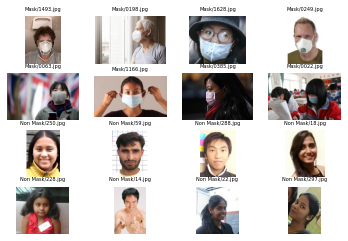

In [40]:
import matplotlib.image as mpimg
nrows=4
ncols=4
# plt.figure(figsize=(12,12))

mask_pic=[] #8 images from mask dir
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
nomask_pic=[] #8 images from mask dir
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
print(mask_pic)
print(nomask_pic)

merged_list=mask_pic+nomask_pic
for i in range(len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=5)
  plt.imshow(image,cmap='gray')
plt.show()

In [41]:
train_datagen=ImageDataGenerator(rescale=1./255,
                              zoom_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True
                              )
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
test_generator=test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
validation_generator=validation_datagen.flow_from_directory(valid_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [42]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [43]:
train_generator.image_shape

(150, 150, 3)

In [45]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [47]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history=model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
19/19 [==============================] - 42s 601ms/step - loss: 2.5743 - accuracy: 0.5255 - val_loss: 0.6881 - val_accuracy: 0.5948
Epoch 2/30
19/19 [==============================] - 11s 606ms/step - loss: 0.6018 - accuracy: 0.7687 - val_loss: 0.5490 - val_accuracy: 0.8497
Epoch 3/30
19/19 [==============================] - 11s 590ms/step - loss: 0.3850 - accuracy: 0.8537 - val_loss: 0.3385 - val_accuracy: 0.9118
Epoch 4/30
19/19 [==============================] - 11s 599ms/step - loss: 0.3077 - accuracy: 0.8829 - val_loss: 0.3418 - val_accuracy: 0.8889
Epoch 5/30
19/19 [==============================] - 11s 603ms/step - loss: 0.2915 - accuracy: 0.8815 - val_loss: 0.3318 - val_accuracy: 0.9216
Epoch 6/30
19/19 [==============================] - 11s 603ms/step - loss: 0.2755 - accuracy: 0.9041 - val_loss: 0.2959 - val_accuracy: 0.9281
Epoch 7/30
19/19 [==============================] - 11s 601ms/step - loss: 0.2723 - accuracy: 0.8955 - val_loss: 0.2427 - val_accuracy: 0.9248

In [49]:
model.save("model.h5")

In [ ]:
history.keys()

In [ ]:
plt.plot()